In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
data

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [3]:
data['class'].shape

(6497,)

In [4]:
data.shape

(6497, 4)

In [5]:
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
X

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [7]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(3,),activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 11)                121       
                                                                 
 dense_6 (Dense)             (None, 12)                144       
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
163/163 [==============================] - 1s 4ms/step - loss: 0.4190 - accuracy: 0.7964 - val_loss: 0.4495 - val_accuracy: 0.7492
Epoch 2/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8226 - val_loss: 0.3571 - val_accuracy: 0.8408
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8328 - val_loss: 0.3467 - val_accuracy: 0.8446
Epoch 4/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8403 - val_loss: 0.3154 - val_accuracy: 0.8715
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8457 - val_loss: 0.2994 - val_accuracy: 0.8815
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8520 - val_loss: 0.3053 - val_accuracy: 0.8777
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8343 - val_loss: 0.3195 - val_accuracy: 0.8654

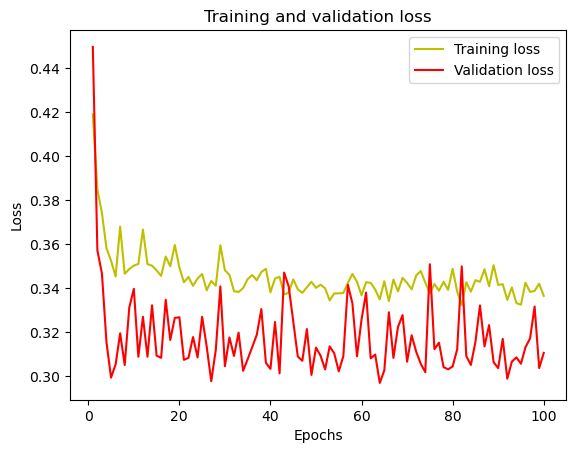

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

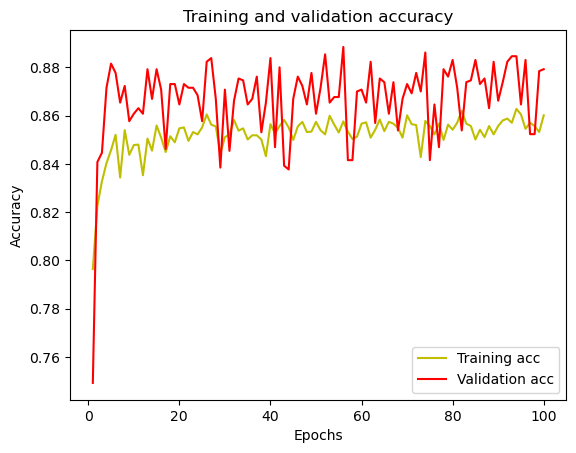

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       311
           1       0.91      0.93      0.92       989

    accuracy                           0.88      1300
   macro avg       0.84      0.82      0.83      1300
weighted avg       0.88      0.88      0.88      1300

[[219  92]
 [ 65 924]]
